In [89]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings

# Suppress a specific warning by category
warnings.filterwarnings("ignore")

## Loading of Dataset

In [90]:
df = pd.read_csv('./data/disease_insurance_price_final.csv')

In [91]:
df.shape

(1338, 15)

In [92]:
pd.set_option('display.max_columns', None)
df.head()

,age,sex,bmi,children,smoker,region,charges,disease,sedantry period,junk food consumption,alcohol consumption,exercise routine,substance use,stress level,charges_bins
0,19.0,female,27.900,0,yes,southwest,16884.92400,Chickenpox,NaN,NaN,NaN,NaN,NaN,NaN,A
1,NaN,male,33.770,1,no,southeast,1725.55230,Hypoglycemia,12hrs,,no,,no,,A
2,28.0,male,33.000,3,no,southeast,4449.46200,Hypoglycemia,2hrs,daily,rarely,frequently,,,A
3,33.0,male,22.705,0,no,northwest,21984.47061,Dengue,NaN,NaN,NaN,NaN,NaN,NaN,A
4,32.0,male,28.880,0,no,northwest,3866.85520,Hypoglycemia,2hrs,frequently,rarely,daily,yes,,A


In [93]:
df['charges_bins'].unique()

array(['A', 'B', 'C'], dtype=object)

In [94]:
df.shape

(1338, 15)

In [95]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1338.000000,1338.000000,1338.000000
mean,39.222887,30.663397,1.094918,13270.422265
std,14.043228,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [96]:
df.dtypes

age                      float64
sex                       object
bmi                      float64
children                   int64
smoker                    object
region                    object
charges                  float64
disease                   object
sedantry period           object
junk food consumption     object
alcohol consumption       object
exercise routine          object
substance use             object
stress level              object
charges_bins              object
dtype: object

In [97]:
# Assuming you have a DataFrame named 'df'
df = df.rename(columns={
    'alcohol consumption': 'alcohol_consumption',
    'sedantry period': 'sed_pd',
    'exercise routine': 'exercise_routine',
    'junk food consumption': 'junk_food_consumption',
    'stress level': 'stress_level',
    'substance use': 'substance_use'
})


## EDA

In [98]:
df.isnull().sum()


age                        1
sex                        0
bmi                        0
children                   0
smoker                     0
region                     0
charges                    0
disease                    0
sed_pd                   571
junk_food_consumption    571
alcohol_consumption      571
exercise_routine         571
substance_use            571
stress_level             571
charges_bins               0
dtype: int64

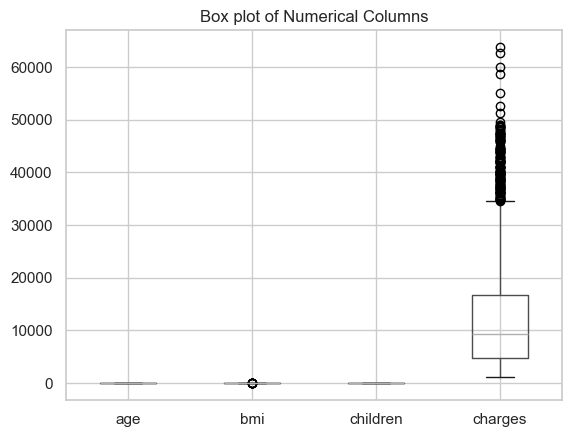

In [99]:
# Visualize box plots for numerical columns 
df.boxplot(column=['age', 'bmi', 'children', 'charges']) 
plt.title('Box plot of Numerical Columns')
plt.show()

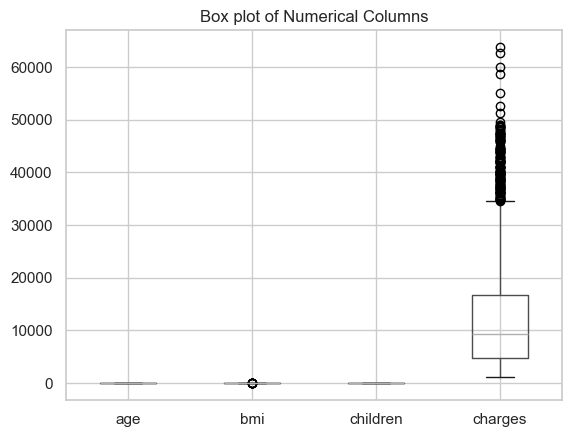

In [100]:
# visualize boxplot after removing outliers
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Box plot of Numerical Columns')
plt.show()

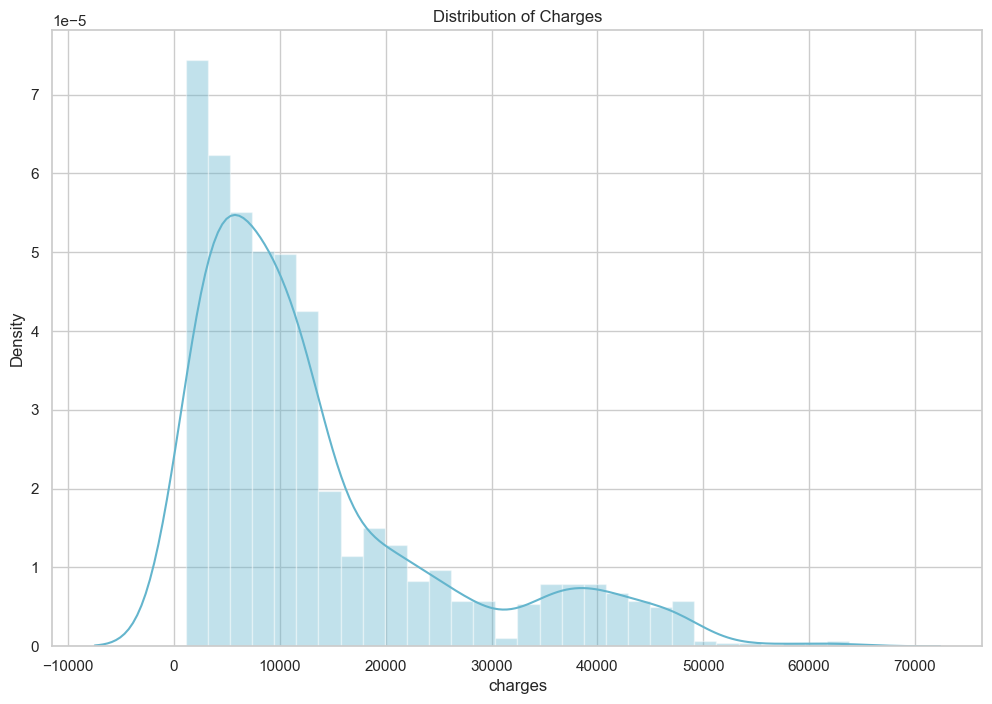

In [101]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')
plt.show()

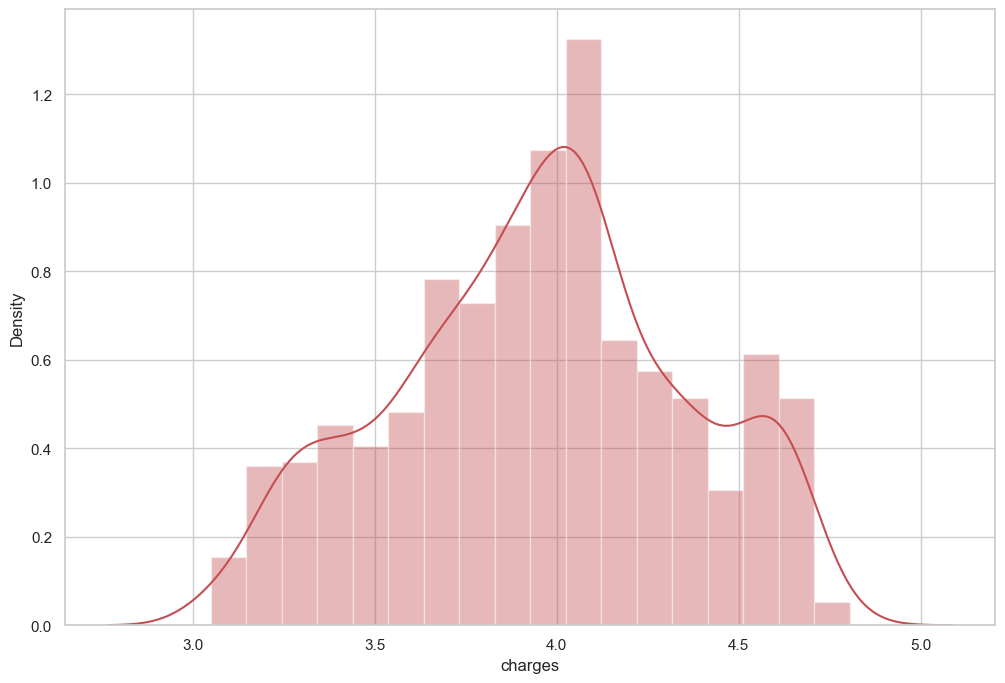

In [102]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )
plt.show()

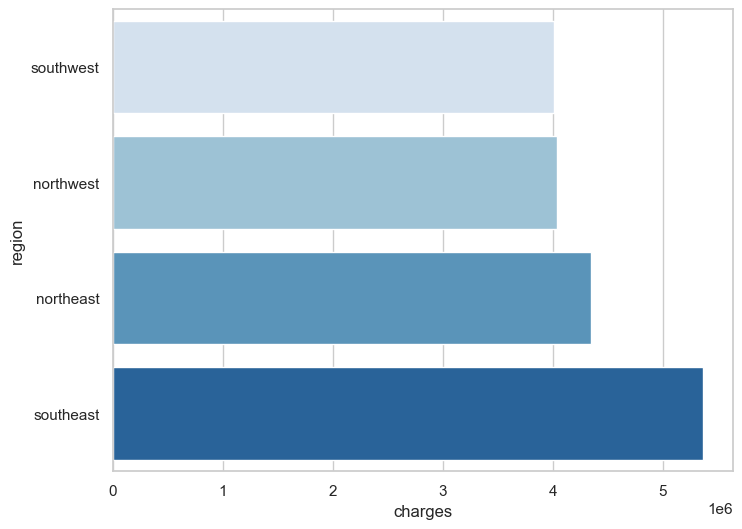

In [103]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x= charges.head(), y=charges.head().index, palette='Blues')
plt.show()


In [104]:
df.isnull().sum()

age                        1
sex                        0
bmi                        0
children                   0
smoker                     0
region                     0
charges                    0
disease                    0
sed_pd                   571
junk_food_consumption    571
alcohol_consumption      571
exercise_routine         571
substance_use            571
stress_level             571
charges_bins               0
dtype: int64

In [105]:
styled_data = (
    df.describe()
    .drop("count", axis=0)
    .style.background_gradient(axis=0, cmap="magma")
    .set_properties(**{"text-align": "center"})
    .set_table_styles([{"selector": "th", "props": [("background-color", "k")]}])
    .set_caption("Summary Statistics")
)

styled_data

,age,bmi,children,charges
mean,39.222887,30.663397,1.094918,13270.422265
std,14.043228,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


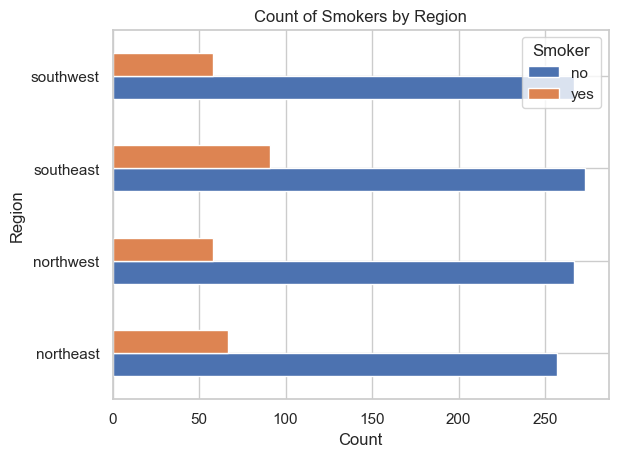

In [106]:
smokers_by_region = df.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

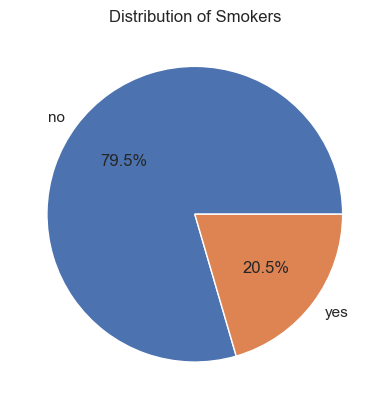

In [107]:
smoker_counts = df['smoker'].value_counts() 
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%') 
plt.title('Distribution of Smokers')
plt.show()

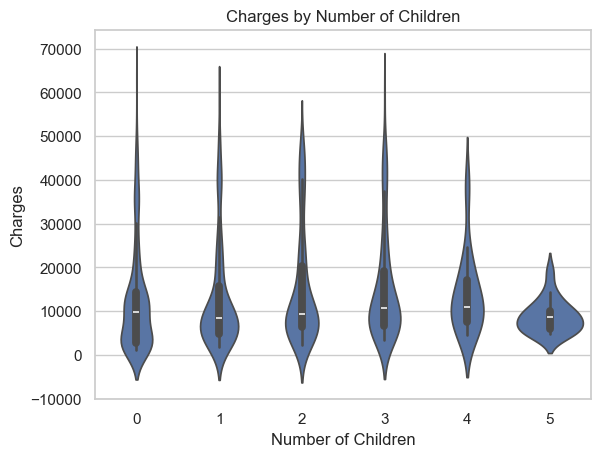

In [108]:
sns.violinplot(x=df['children'], y=df['charges'])

plt.xlabel('Number of Children')
plt.ylabel('Charges')

plt.title('Charges by Number of Children')
plt.show()

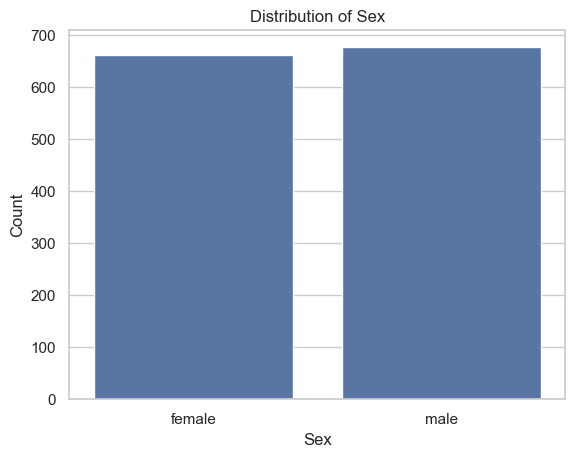

In [109]:
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

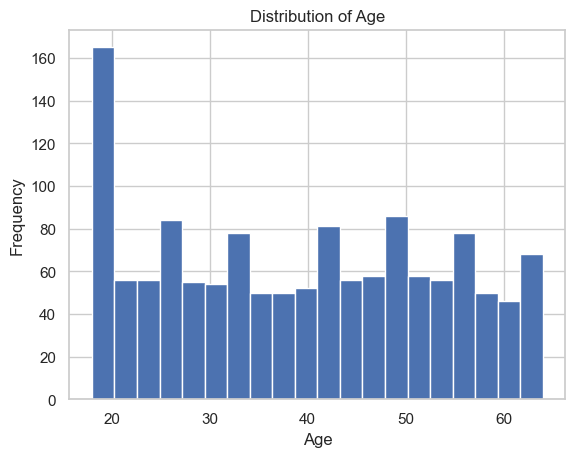

In [110]:
# distribution of age using histogram
df['age'].plot(kind='hist', bins=20)

plt.xlabel('Age')
plt.title('Distribution of Age')

plt.show()

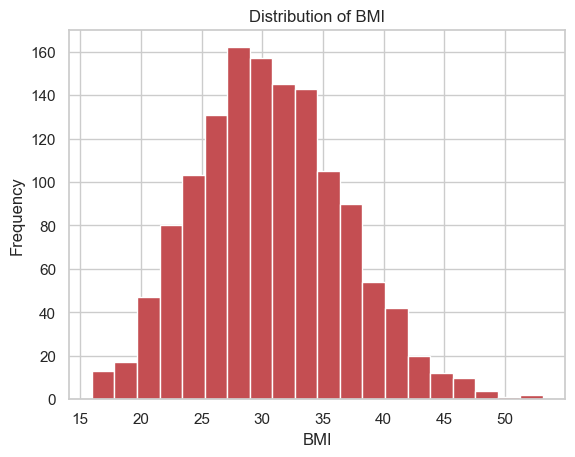

In [111]:
# distribution of BMI using histogram
df['bmi'].plot(kind='hist', bins=20, color='r')
plt.xlabel('BMI')
plt.title('Distribution of BMI')
plt.show()

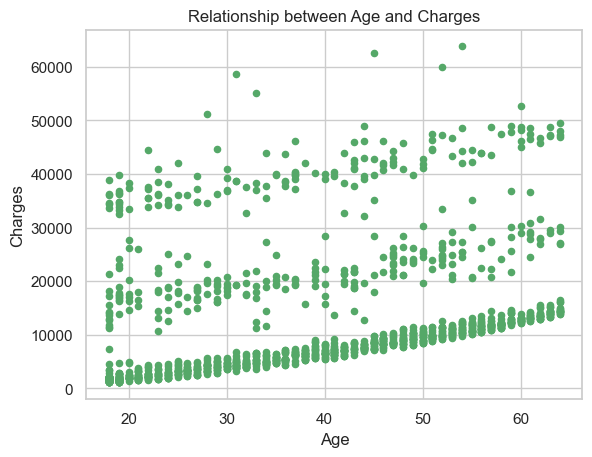

In [112]:
# relationship between age and charges using scatterplot
df.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

In [113]:
df['disease'].unique()

array(['Chickenpox', 'Hypoglycemia', 'Dengue', 'Urinary tract infection',
       'GERD (Gastroesophageal Reflux Disease)', 'Migraine',
       'Gastroenteritis', 'Paroxysmal Positional Vertigo (Vertigo)',
       'Arthritis', 'Cervical spondylosis', 'Hepatitis A', 'Diabetes',
       'Allergy', 'Osteoarthritis', 'Fungal infection', 'Hyperthyroidism',
       'AIDS', 'Tuberculosis', 'Chronic cholestasis', 'Drug Reaction',
       'Dimorphic hemorrhoids (piles)', 'Bronchial Asthma', 'Jaundice',
       'Varicose veins', 'Hypothyroidism', 'Malaria',
       'Alcoholic hepatitis', 'Hepatitis D', 'Hepatitis B',
       'Paralysis (brain hemorrhage)', 'Heart attack', 'Typhoid'],
      dtype=object)

In [114]:
df['charges_bins'].unique()

array(['A', 'B', 'C'], dtype=object)

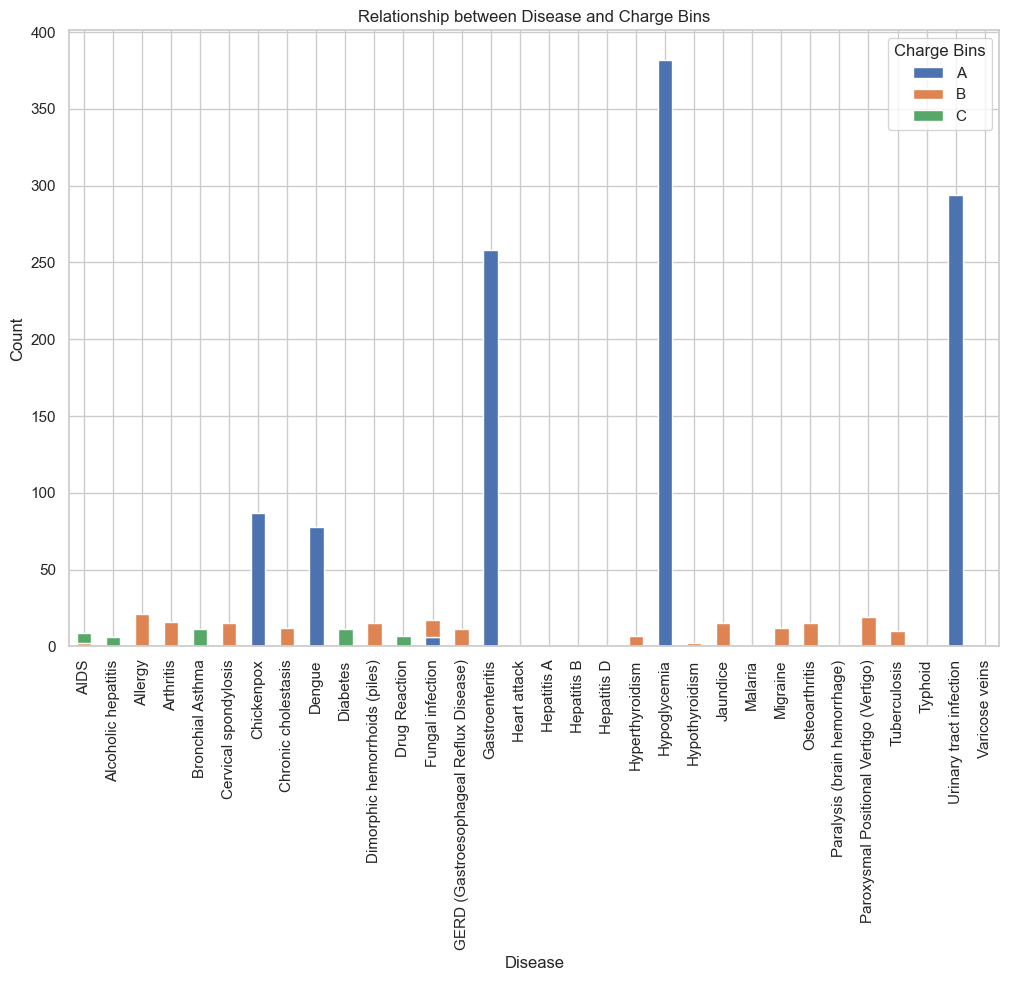

In [115]:
grouped_data = df.groupby(['disease', 'charges_bins']).size().unstack().fillna(0)

# Plot the data as a stacked bar plot
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Relationship between Disease and Charge Bins')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.legend(title='Charge Bins')
plt.show()

There is a linearly increasing relationship between age and insurance charges. Older people are tend to be charged more

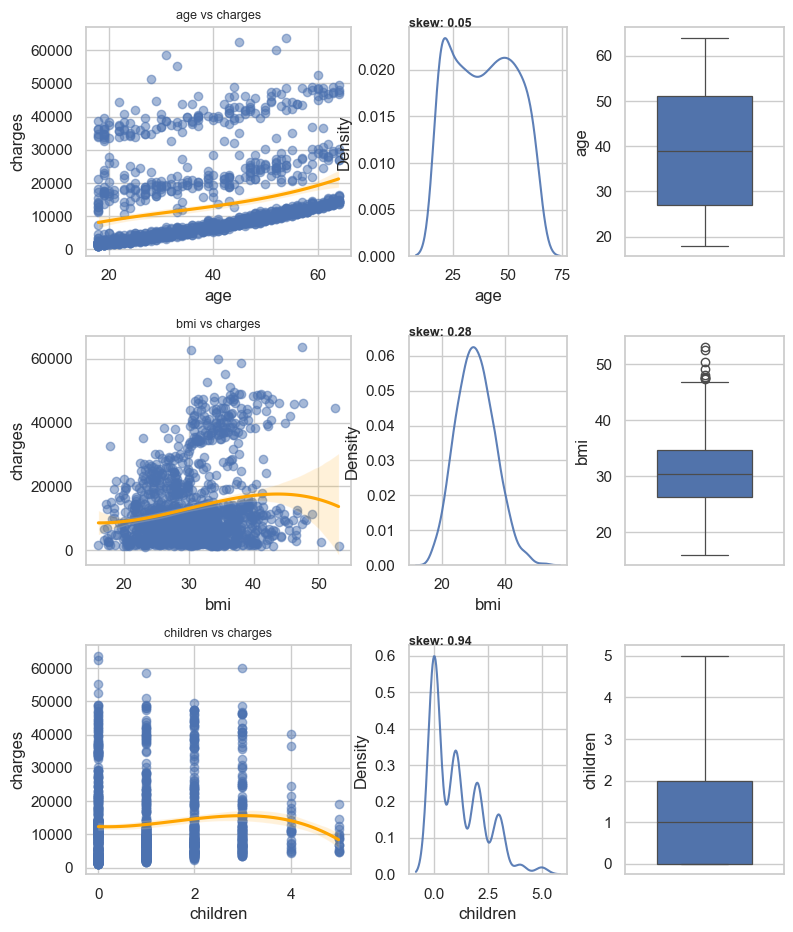

In [116]:
number_columns = df.select_dtypes("number").drop("charges", axis=1)

skewness_before_log = df[number_columns.columns].skew()
fig, axes = plt.subplots(
    nrows=3,
    ncols=3,
    figsize=(9, 11),
    gridspec_kw={"hspace": 0.35, "wspace": 0.3, "width_ratios": [0.5, 0.3, 0.3]},
)
axes = axes.flatten()
i = 0
for column in number_columns.columns:
    ax = axes[i]
    sns.regplot(
        data=df,
        x=column,
        y="charges",
        ax=ax,
        scatter_kws={"alpha": 0.5},
        marker="o",
        line_kws={"color": "orange"},
        order=3,
    )
    ax.set_title(f"{column} vs charges", size=9)
    ax = axes[i + 1]
    sns.kdeplot(data=df, x=column, ax=ax, fill=False, alpha=0.9, legend=True)
    skewness = skewness_before_log[column]
    ax.text(
        ax.get_xlim()[0],
        ax.get_ylim()[-1],
        f"skew: {skewness:.2f}",
        size=9,
        weight="bold",
    )

    ax = axes[i + 2]
    sns.boxplot(
        data=df,
        y=column,
        ax=ax,
        width=0.6,
        saturation=0.9,
        linewidth=0.9,
    )
    i += 3
plt.show()


In [117]:
df['exercise_routine'].unique()

array([nan, ' ', 'frequently', 'daily', 'rarely', 'no'], dtype=object)

In [118]:
df['alcohol_consumption'].unique()

array([nan, 'no', 'rarely', ' ', 'daily', 'frequently'], dtype=object)

In [119]:
df['junk_food_consumption'].unique()

array([nan, ' ', 'daily', 'frequently', 'rarely'], dtype=object)

In [120]:
df['sed_pd'].unique()

array([nan, '12hrs', '2hrs', 'whole day', '4hrs', '6hrs', ' ', '8hrs'],
      dtype=object)

In [121]:
df['sed_pd'] = df['sed_pd'].str.replace('hrs', '', regex=False)
df['sed_pd'].unique()

array([nan, '12', '2', 'whole day', '4', '6', ' ', '8'], dtype=object)

In [122]:
df['substance_use'].unique()

array([nan, 'no', ' ', 'yes'], dtype=object)

In [123]:
df['stress_level'].unique()

array([nan, ' ', 'high', 'medium', 'low'], dtype=object)

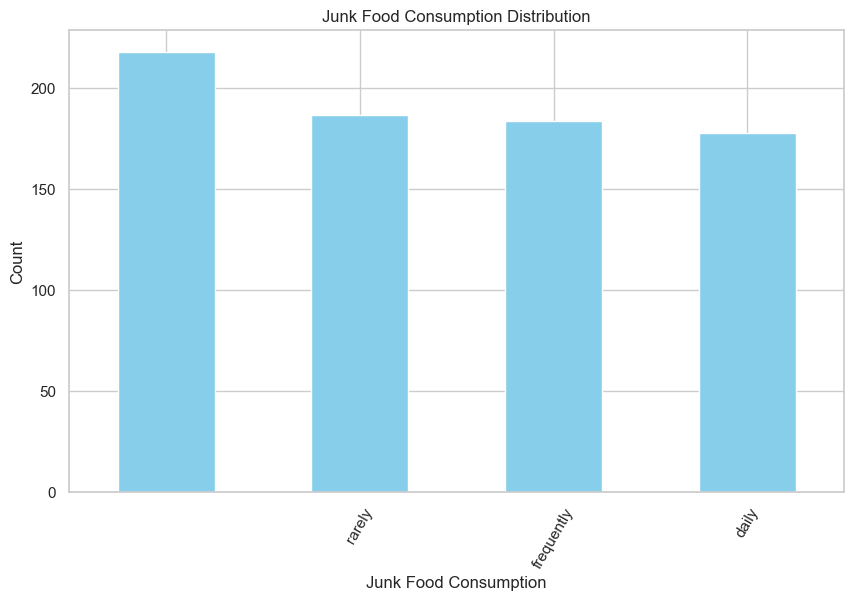

In [124]:
charge_bins_counts = df['junk_food_consumption'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('Junk Food Consumption Distribution')
plt.xlabel('Junk Food Consumption')
plt.ylabel('Count')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability
plt.show()

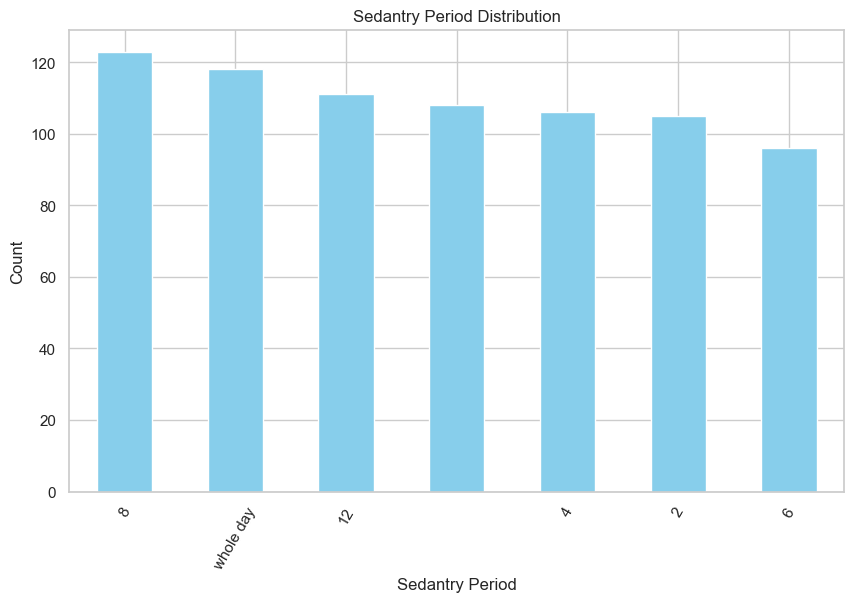

In [125]:
charge_bins_counts = df['sed_pd'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('Sedantry Period Distribution')
plt.xlabel('Sedantry Period')
plt.ylabel('Count')
plt.xticks(rotation=60)  
plt.show()

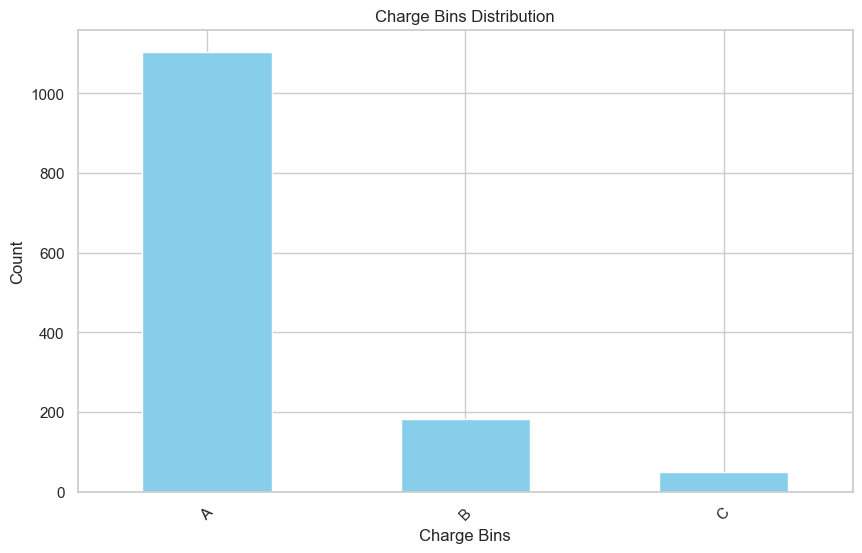

In [126]:
charge_bins_counts = df['charges_bins'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('Charge Bins Distribution')
plt.xlabel('Charge Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

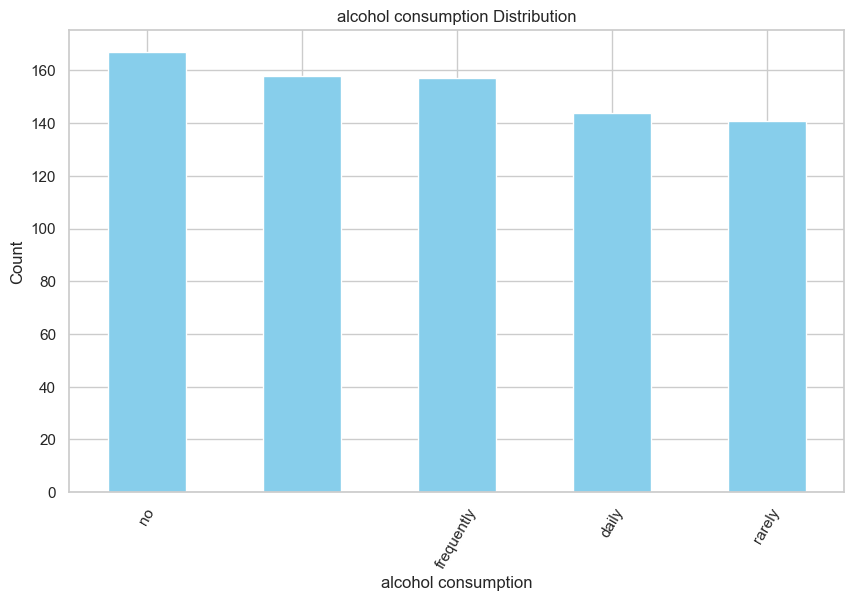

In [127]:
charge_bins_counts = df['alcohol_consumption'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('alcohol consumption Distribution')
plt.xlabel('alcohol consumption')
plt.ylabel('Count')
plt.xticks(rotation=60)  
plt.show()

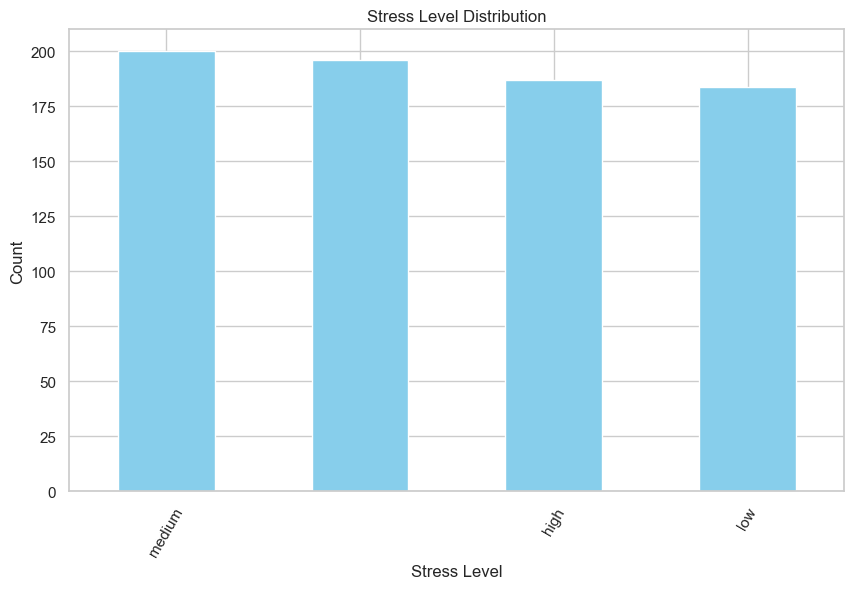

In [128]:
charge_bins_counts = df['stress_level'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
charge_bins_counts.plot(kind='bar', color='skyblue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(rotation=60)  
plt.show()

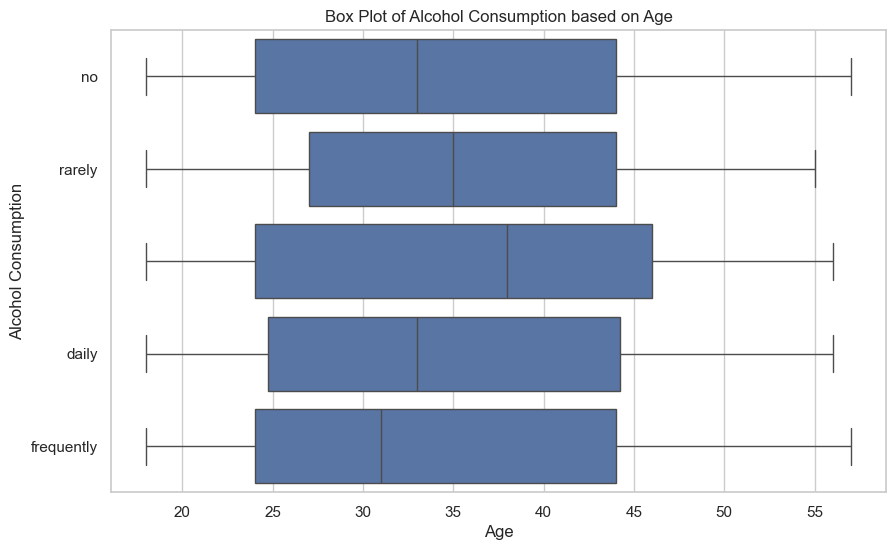

In [129]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='alcohol_consumption', data=df)
plt.title('Box Plot of Alcohol Consumption based on Age')
plt.xlabel('Age')
plt.ylabel('Alcohol Consumption')
plt.show()

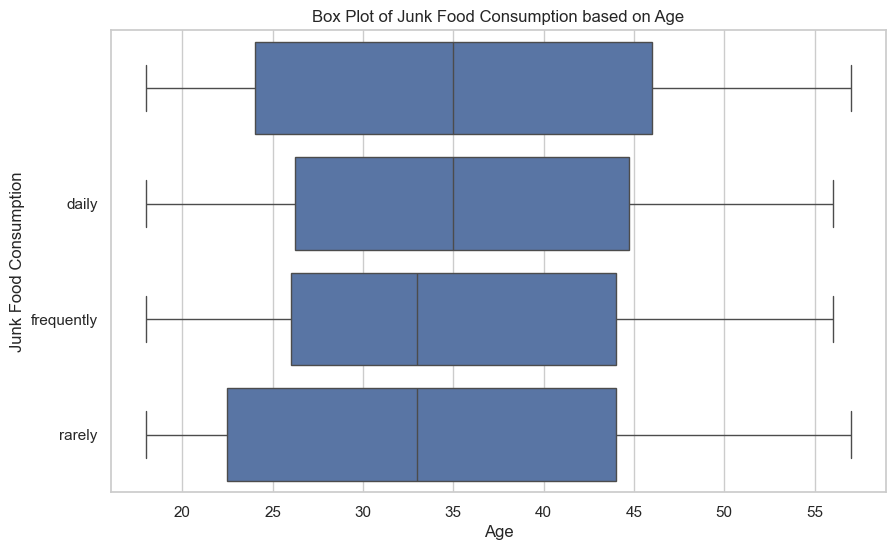

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='junk_food_consumption', data=df)
plt.title('Box Plot of Junk Food Consumption based on Age')
plt.xlabel('Age')
plt.ylabel('Junk Food Consumption')
plt.show()

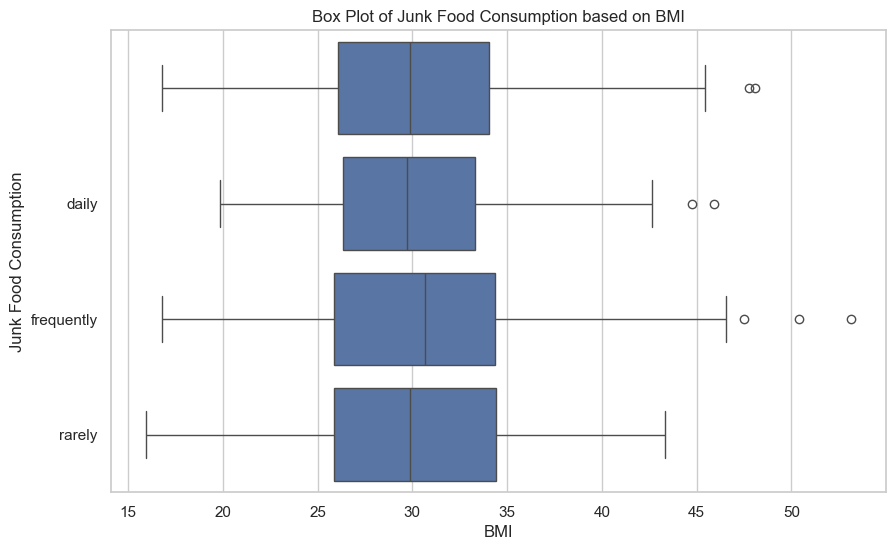

In [131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', y='junk_food_consumption', data=df)
plt.title('Box Plot of Junk Food Consumption based on BMI')
plt.xlabel('BMI')
plt.ylabel('Junk Food Consumption')
plt.show()

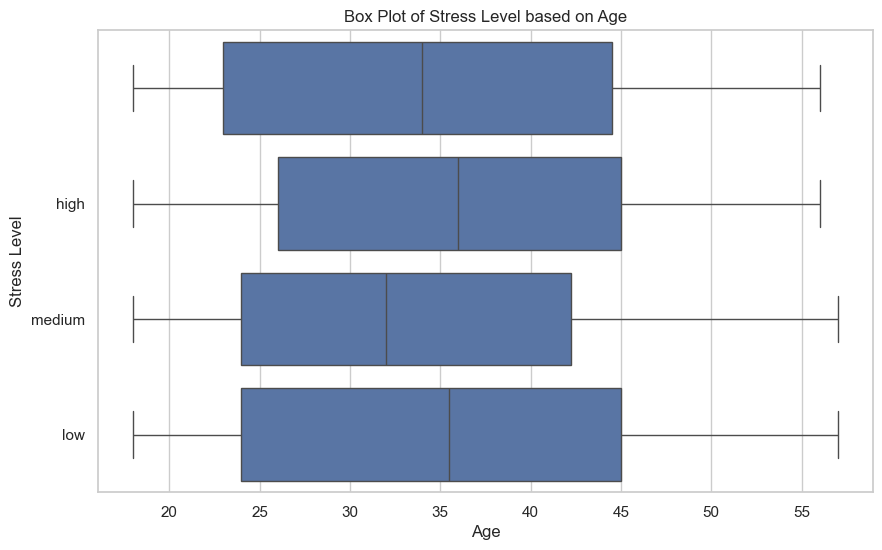

In [132]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='stress_level', data=df)
plt.title('Box Plot of Stress Level based on Age')
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.show()

## Preprocessing

### Fixing of column datatypes and values

In [133]:
df['sed_pd'] = df['sed_pd'].replace('whole day', '24')

df['sed_pd'] = pd.to_numeric(df['sed_pd'], errors='coerce').astype('Int64')
df['sed_pd'].unique()


<IntegerArray>
[<NA>, 12, 2, 24, 4, 6, 8]
Length: 7, dtype: Int64

### One Hot Encoding

In [134]:
df

,age,sex,bmi,children,smoker,region,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins
0,19.0,female,27.900,0,yes,southwest,16884.92400,Chickenpox,<NA>,NaN,NaN,NaN,NaN,NaN,A
1,NaN,male,33.770,1,no,southeast,1725.55230,Hypoglycemia,12,,no,,no,,A
2,28.0,male,33.000,3,no,southeast,4449.46200,Hypoglycemia,2,daily,rarely,frequently,,,A
3,33.0,male,22.705,0,no,northwest,21984.47061,Dengue,<NA>,NaN,NaN,NaN,NaN,NaN,A
4,32.0,male,28.880,0,no,northwest,3866.85520,Hypoglycemia,2,frequently,rarely,daily,yes,,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830,Gastroenteritis,4,rarely,no,no,,low,A
1334,18.0,female,31.920,0,no,northeast,2205.98080,Hypoglycemia,6,,rarely,,yes,low,A
1335,18.0,female,36.850,0,no,southeast,1629.83350,Hypoglycemia,6,rarely,no,daily,yes,low,A
1336,21.0,female,25.800,0,no,southwest,2007.94500,Hypoglycemia,<NA>,daily,,rarely,,medium,A


In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

labeled = ['disease', 'charges_bins']
onehot = ['region']

transformer = ColumnTransformer([
    ('Label Encoding Disease', OrdinalEncoder(), labeled),
    ('Onehot Encoding', OneHotEncoder(drop='first', sparse_output=False), onehot)
    ], remainder = 'passthrough')

transformed = transformer.fit_transform(df)
# temp = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())

In [136]:
transformer.get_feature_names_out()

array(['Label Encoding Disease__disease',
       'Label Encoding Disease__charges_bins',
       'Onehot Encoding__region_northwest',
       'Onehot Encoding__region_southeast',
       'Onehot Encoding__region_southwest', 'remainder__age',
       'remainder__sex', 'remainder__bmi', 'remainder__children',
       'remainder__smoker', 'remainder__charges', 'remainder__sed_pd',
       'remainder__junk_food_consumption',
       'remainder__alcohol_consumption', 'remainder__exercise_routine',
       'remainder__substance_use', 'remainder__stress_level'],
      dtype=object)

In [137]:
new_column_names = [col.split('__')[-1] for col in transformer.get_feature_names_out()]
new_column_names = [col.split('region_')[-1] for col in new_column_names]
new_column_names

['disease',
 'charges_bins',
 'northwest',
 'southeast',
 'southwest',
 'age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'sed_pd',
 'junk_food_consumption',
 'alcohol_consumption',
 'exercise_routine',
 'substance_use',
 'stress_level']

In [138]:
temp = pd.DataFrame(transformed, columns=new_column_names)

In [139]:
temp['age_group'] = pd.cut(temp['age'], bins=[0, 25, 40, 60, temp['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

In [140]:
temp

,disease,charges_bins,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,age_group
0,6.0,0.0,0.0,0.0,1.0,19.0,female,27.9,0,yes,16884.924,<NA>,NaN,NaN,NaN,NaN,NaN,Young
1,20.0,0.0,0.0,1.0,0.0,NaN,male,33.77,1,no,1725.5523,12,,no,,no,,NaN
2,20.0,0.0,0.0,1.0,0.0,28.0,male,33.0,3,no,4449.462,2,daily,rarely,frequently,,,Young
3,8.0,0.0,1.0,0.0,0.0,33.0,male,22.705,0,no,21984.47061,<NA>,NaN,NaN,NaN,NaN,NaN,Adult
4,20.0,0.0,1.0,0.0,0.0,32.0,male,28.88,0,no,3866.8552,2,frequently,rarely,daily,yes,,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,14.0,0.0,1.0,0.0,0.0,50.0,male,30.97,3,no,10600.5483,4,rarely,no,no,,low,Middle-aged
1334,20.0,0.0,0.0,0.0,0.0,18.0,female,31.92,0,no,2205.9808,6,,rarely,,yes,low,Young
1335,20.0,0.0,0.0,1.0,0.0,18.0,female,36.85,0,no,1629.8335,6,rarely,no,daily,yes,low,Young
1336,20.0,0.0,0.0,0.0,1.0,21.0,female,25.8,0,no,2007.945,<NA>,daily,,rarely,,medium,Young


In [141]:
temp = temp[['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 
              'disease', 'sed_pd', 'junk_food_consumption', 
              'alcohol_consumption', 'exercise_routine', 'substance_use', 
              'stress_level', 'charges_bins', 'northwest', 
              'southeast', 'southwest', 'age_group']]

In [142]:
temp

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
0,19.0,female,27.9,0,yes,16884.924,6.0,<NA>,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,Young
1,NaN,male,33.77,1,no,1725.5523,20.0,12,,no,,no,,0.0,0.0,1.0,0.0,NaN
2,28.0,male,33.0,3,no,4449.462,20.0,2,daily,rarely,frequently,,,0.0,0.0,1.0,0.0,Young
3,33.0,male,22.705,0,no,21984.47061,8.0,<NA>,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,Adult
4,32.0,male,28.88,0,no,3866.8552,20.0,2,frequently,rarely,daily,yes,,0.0,1.0,0.0,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.97,3,no,10600.5483,14.0,4,rarely,no,no,,low,0.0,1.0,0.0,0.0,Middle-aged
1334,18.0,female,31.92,0,no,2205.9808,20.0,6,,rarely,,yes,low,0.0,0.0,0.0,0.0,Young
1335,18.0,female,36.85,0,no,1629.8335,20.0,6,rarely,no,daily,yes,low,0.0,0.0,1.0,0.0,Young
1336,21.0,female,25.8,0,no,2007.945,20.0,<NA>,daily,,rarely,,medium,0.0,0.0,0.0,1.0,Young


In [143]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    1337 non-null   object  
 1   sex                    1338 non-null   object  
 2   bmi                    1338 non-null   object  
 3   children               1338 non-null   object  
 4   smoker                 1338 non-null   object  
 5   charges                1338 non-null   object  
 6   disease                1338 non-null   object  
 7   sed_pd                 659 non-null    object  
 8   junk_food_consumption  767 non-null    object  
 9   alcohol_consumption    767 non-null    object  
 10  exercise_routine       767 non-null    object  
 11  substance_use          767 non-null    object  
 12  stress_level           767 non-null    object  
 13  charges_bins           1338 non-null   object  
 14  northwest              1338 non-null   o

#

In [144]:

from sklearn.preprocessing import OneHotEncoder
"""
        One-hot encodes a categorical feature in a DataFrame.

    Parameters:
    - encoder (OneHotEncoder): The OneHotEncoder object fitted on the training data.
    - dataframe (DataFrame): The DataFrame containing the feature to be one-hot encoded.
    - feature (str): The name of the categorical feature to be encoded.

    Returns:
    - DataFrame: A new DataFrame with the specified feature one-hot encoded and the original feature dropped.
    """

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):
    # Use the encoder to transform the specified feature
    encoded = encoder.transform(dataframe[[feature]])

    # Extract the category labels for the feature
    categories = encoder.categories_[0]
    # Create a DataFrame with one-hot encoded columns and category labels as column names
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    # Concatenate the original DataFrame and the one-hot encoded DataFrame
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    # Drop the original feature from the resulting DataFrame
    return concat_dataframe.drop(feature, axis=1)
    
    

In [145]:
# Since 'region' has multiple value and to prevent the ordinality that comes with it, one-hot encoding is applied to it
region_ohe = OneHotEncoder(drop='first').fit(df[['region']])
df = one_hot_transform(region_ohe, df, 'region')

### Fixing the class imbalanes in each charges_bins classes

In [146]:
df['charges_bins'].value_counts()

charges_bins
A    1105
B     183
C      50
Name: count, dtype: int64

Here, I have decided to go with weight assignment instead of upsampling and downsampling as using class weights is computationally efficient, assigning higher importance to the minority class during training. Upsampling involves creating more instances of the minority class, increasing computational load and risking overfitting. Downsampling removes instances from the majority class, potentially leading to information loss. Class weights are a balanced approach for handling class imbalance in machine learning.

### Feature Engineering

In [147]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 40, 60, df['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df.sample(5)

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
1261,28.0,male,37.100,1,no,3277.16100,Hypoglycemia,8,rarely,frequently,daily,yes,medium,A,0.0,0.0,1.0,Adult
708,31.0,female,30.495,3,no,6113.23105,Urinary tract infection,<NA>,,no,no,yes,high,A,0.0,0.0,0.0,Adult
1078,28.0,male,31.680,0,yes,34672.14720,Osteoarthritis,<NA>,NaN,NaN,NaN,NaN,NaN,B,0.0,1.0,0.0,Adult
534,64.0,male,40.480,0,no,13831.11520,Chickenpox,<NA>,NaN,NaN,NaN,NaN,NaN,A,0.0,1.0,0.0,Senior
839,59.0,female,31.350,0,no,12622.17950,Gastroenteritis,<NA>,NaN,NaN,NaN,NaN,NaN,A,1.0,0.0,0.0,Middle-aged


### Label Encoding of non-null columns

In [148]:
df

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
0,19.0,female,27.900,0,yes,16884.92400,Chickenpox,<NA>,NaN,NaN,NaN,NaN,NaN,A,0.0,0.0,1.0,Young
1,NaN,male,33.770,1,no,1725.55230,Hypoglycemia,12,,no,,no,,A,0.0,1.0,0.0,NaN
2,28.0,male,33.000,3,no,4449.46200,Hypoglycemia,2,daily,rarely,frequently,,,A,0.0,1.0,0.0,Adult
3,33.0,male,22.705,0,no,21984.47061,Dengue,<NA>,NaN,NaN,NaN,NaN,NaN,A,1.0,0.0,0.0,Adult
4,32.0,male,28.880,0,no,3866.85520,Hypoglycemia,2,frequently,rarely,daily,yes,,A,1.0,0.0,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,10600.54830,Gastroenteritis,4,rarely,no,no,,low,A,1.0,0.0,0.0,Middle-aged
1334,18.0,female,31.920,0,no,2205.98080,Hypoglycemia,6,,rarely,,yes,low,A,0.0,0.0,0.0,Young
1335,18.0,female,36.850,0,no,1629.83350,Hypoglycemia,6,rarely,no,daily,yes,low,A,0.0,1.0,0.0,Young
1336,21.0,female,25.800,0,no,2007.94500,Hypoglycemia,<NA>,daily,,rarely,,medium,A,0.0,0.0,1.0,Young


In [149]:
df['disease'].unique()

array(['Chickenpox', 'Hypoglycemia', 'Dengue', 'Urinary tract infection',
       'GERD (Gastroesophageal Reflux Disease)', 'Migraine',
       'Gastroenteritis', 'Paroxysmal Positional Vertigo (Vertigo)',
       'Arthritis', 'Cervical spondylosis', 'Hepatitis A', 'Diabetes',
       'Allergy', 'Osteoarthritis', 'Fungal infection', 'Hyperthyroidism',
       'AIDS', 'Tuberculosis', 'Chronic cholestasis', 'Drug Reaction',
       'Dimorphic hemorrhoids (piles)', 'Bronchial Asthma', 'Jaundice',
       'Varicose veins', 'Hypothyroidism', 'Malaria',
       'Alcoholic hepatitis', 'Hepatitis D', 'Hepatitis B',
       'Paralysis (brain hemorrhage)', 'Heart attack', 'Typhoid'],
      dtype=object)

In [86]:
disease_label_encoder = LabelEncoder()
df['disease'] = disease_label_encoder.fit_transform(df['disease'])

In [88]:
import joblib
joblib.dump(disease_label_encoder, './model/disease_encoder.pkl')

['./model/disease_encoder.pkl']

In [87]:
df

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
0,19.0,female,27.900,0,yes,16884.92400,6,<NA>,NaN,NaN,NaN,NaN,NaN,A,0.0,0.0,1.0,Young
1,NaN,male,33.770,1,no,1725.55230,20,12,,no,,no,,A,0.0,1.0,0.0,NaN
2,28.0,male,33.000,3,no,4449.46200,20,2,daily,rarely,frequently,,,A,0.0,1.0,0.0,Adult
3,33.0,male,22.705,0,no,21984.47061,8,<NA>,NaN,NaN,NaN,NaN,NaN,A,1.0,0.0,0.0,Adult
4,32.0,male,28.880,0,no,3866.85520,20,2,frequently,rarely,daily,yes,,A,1.0,0.0,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,10600.54830,14,4,rarely,no,no,,low,A,1.0,0.0,0.0,Middle-aged
1334,18.0,female,31.920,0,no,2205.98080,20,6,,rarely,,yes,low,A,0.0,0.0,0.0,Young
1335,18.0,female,36.850,0,no,1629.83350,20,6,rarely,no,daily,yes,low,A,0.0,1.0,0.0,Young
1336,21.0,female,25.800,0,no,2007.94500,20,<NA>,daily,,rarely,,medium,A,0.0,0.0,1.0,Young


In [61]:
charge_bins_label_encoder = LabelEncoder()
df['charges_bins'] = charge_bins_label_encoder.fit_transform(df['charges_bins'])

In [62]:
df.columns.tolist()

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'disease',
 'sed_pd',
 'junk_food_consumption',
 'alcohol_consumption',
 'exercise_routine',
 'substance_use',
 'stress_level',
 'charges_bins',
 'northwest',
 'southeast',
 'southwest',
 'age_group']

### Imputation

In [63]:
df.isna().sum()

age                        1
sex                        0
bmi                        0
children                   0
smoker                     0
charges                    0
disease                    0
sed_pd                   679
junk_food_consumption    571
alcohol_consumption      571
exercise_routine         571
substance_use            571
stress_level             571
charges_bins               0
northwest                  0
southeast                  0
southwest                  0
age_group                  1
dtype: int64

#### For numeric columns

In [64]:
df['age'].skew()

0.05498243236141691

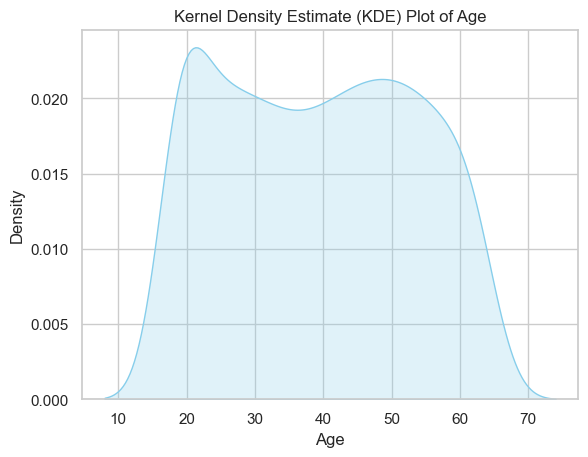

In [65]:
sns.kdeplot(df['age'], fill=True, color='skyblue')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) Plot of Age')

# Show the plot
plt.show()

In [66]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the 'age' column
df['age'] = imputer.fit_transform(df[['age']])

The output of skew() function indicates that the it is close to 0 which means its symmetrical aka normally distributed similarly, we can observed the symmetric distribution of age in KDE plot

#### For categoric columns

In [67]:
df['sed_pd'].unique()

<IntegerArray>
[<NA>, 12, 2, 24, 4, 6, 8]
Length: 7, dtype: Int64

Here the sed period is converted to numeric where while day is mapped to 24. All the other value which cannot be converted to int such as ' ' and nan is converted to nan

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Assuming 'sed_ped' and 'alcohol_consumption' are the columns with missing values
# Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the imputer on the specified columns
df[['sed_pd']] = imputer.fit_transform(df[['sed_pd']])


Iterative imputer has been used for sedantery period nan values as it displays non-linear relationship with other columns and sedantery period is not something to captured by the statistical methods but can be predicted by a person's bmi or age group

In [69]:
df.isna().sum()

age                        0
sex                        0
bmi                        0
children                   0
smoker                     0
charges                    0
disease                    0
sed_pd                     0
junk_food_consumption    571
alcohol_consumption      571
exercise_routine         571
substance_use            571
stress_level             571
charges_bins               0
northwest                  0
southeast                  0
southwest                  0
age_group                  1
dtype: int64

In [70]:
columns_to_impute = ['alcohol_consumption', 'junk_food_consumption', 'exercise_routine', 'substance_use', 'stress_level']

# Convert empty strings to NaN
df[columns_to_impute] = df[columns_to_impute].replace(' ', np.nan)

# Create a SimpleImputer instance with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the specified columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [71]:
df.isna().sum()

age                      0
sex                      0
bmi                      0
children                 0
smoker                   0
charges                  0
disease                  0
sed_pd                   0
junk_food_consumption    0
alcohol_consumption      0
exercise_routine         0
substance_use            0
stress_level             0
charges_bins             0
northwest                0
southeast                0
southwest                0
age_group                1
dtype: int64

### Handling null in age group

In [72]:
df.loc[df['age'].isna(), 'age_group'] = pd.cut(df.loc[df['age'].isna(), 'age'], bins=[0, 25, 40, 60, df['age'].max()], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

### Label Encoding

In [73]:
df_before_labeled = df.copy()

In [74]:
# Initiating the label encoders
gender_label_encoder = LabelEncoder()
alcohol_label_encoder = LabelEncoder()
exercise_label_encoder = LabelEncoder()
sed_pd_label_encoder = LabelEncoder()
junk_label_encoder = LabelEncoder()
smoker_label_encoder = LabelEncoder()
stress_label_encoder = LabelEncoder()
subs_label_encoder = LabelEncoder()
age_group_label_encoder = LabelEncoder()


# Fit and transform the columns of X_train
df['sex'] = gender_label_encoder.fit_transform(df['sex'])
df['alcohol_consumption'] = alcohol_label_encoder.fit_transform(df['alcohol_consumption'])
df['exercise_routine'] = exercise_label_encoder.fit_transform(df['exercise_routine'])
df['sed_pd'] = sed_pd_label_encoder.fit_transform(df['sed_pd'])
df['junk_food_consumption'] = junk_label_encoder.fit_transform(df['junk_food_consumption'])
df['smoker'] = smoker_label_encoder.fit_transform(df['smoker'])
df['stress_level'] = stress_label_encoder.fit_transform(df['stress_level'])
df['substance_use'] = subs_label_encoder.fit_transform(df['substance_use'])
df['age_group'] = age_group_label_encoder.fit_transform(df['age_group'])


The disease column has been label encoded even though there is no ordinal relationship among them as they number of unqiue diseases are very high (32) so the number of columns of our dataframe will be very big and ugly and may impact in efficiency of model. The other columns are label encoded as they have an ordinality among them such as Male/Female, rarely/daily and so on

In [75]:
df_before_labeled

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
0,19.000000,female,27.900,0,yes,16884.92400,6,9.647951,rarely,no,daily,no,medium,0,0.0,0.0,1.0,Young
1,39.222887,male,33.770,1,no,1725.55230,20,12.000000,rarely,no,daily,no,medium,0,0.0,1.0,0.0,NaN
2,28.000000,male,33.000,3,no,4449.46200,20,2.000000,daily,rarely,frequently,no,medium,0,0.0,1.0,0.0,Adult
3,33.000000,male,22.705,0,no,21984.47061,8,9.647951,rarely,no,daily,no,medium,0,1.0,0.0,0.0,Adult
4,32.000000,male,28.880,0,no,3866.85520,20,2.000000,frequently,rarely,daily,yes,medium,0,1.0,0.0,0.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.000000,male,30.970,3,no,10600.54830,14,4.000000,rarely,no,no,no,low,0,1.0,0.0,0.0,Middle-aged
1334,18.000000,female,31.920,0,no,2205.98080,20,6.000000,rarely,rarely,daily,yes,low,0,0.0,0.0,0.0,Young
1335,18.000000,female,36.850,0,no,1629.83350,20,6.000000,rarely,no,daily,yes,low,0,0.0,1.0,0.0,Young
1336,21.000000,female,25.800,0,no,2007.94500,20,9.647951,daily,no,rarely,no,medium,0,0.0,0.0,1.0,Young


In [76]:
df

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
0,19.000000,0,27.900,0,1,16884.92400,6,4,2,2,0,0,2,0,0.0,0.0,1.0,3
1,39.222887,1,33.770,1,0,1725.55230,20,5,2,2,0,0,2,0,0.0,1.0,0.0,4
2,28.000000,1,33.000,3,0,4449.46200,20,0,0,3,1,0,2,0,0.0,1.0,0.0,0
3,33.000000,1,22.705,0,0,21984.47061,8,4,2,2,0,0,2,0,1.0,0.0,0.0,0
4,32.000000,1,28.880,0,0,3866.85520,20,0,1,3,0,1,2,0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50.000000,1,30.970,3,0,10600.54830,14,1,2,2,2,0,1,0,1.0,0.0,0.0,1
1334,18.000000,0,31.920,0,0,2205.98080,20,2,2,3,0,1,1,0,0.0,0.0,0.0,3
1335,18.000000,0,36.850,0,0,1629.83350,20,2,2,2,0,1,1,0,0.0,1.0,0.0,3
1336,21.000000,0,25.800,0,0,2007.94500,20,4,0,2,3,0,2,0,0.0,0.0,1.0,3


In [77]:
for c in ['sex', 'alcohol_consumption', 'exercise_routine', 'sed_pd', 'junk_food_consumption', 'smoker', 'stress_level', 'substance_use', 'age_group']:
    print(c)
    sorted_lists = sorted(zip(df[c].unique(), df_before_labeled[c].unique()))
    print(sorted_lists)
    print('_'*50)

print('='*50)
print('In the tuple it is (*label, *encoded label)')

sex
[(0, 'female'), (1, 'male')]
__________________________________________________
alcohol_consumption
[(0, 'daily'), (1, 'frequently'), (2, 'no'), (3, 'rarely')]
__________________________________________________
exercise_routine
[(0, 'daily'), (1, 'frequently'), (2, 'no'), (3, 'rarely')]
__________________________________________________
sed_pd
[(0, 2.0), (1, 4.0), (2, 6.0), (3, 8.0), (4, 9.647951441578149), (5, 12.0), (6, 24.0)]
__________________________________________________
junk_food_consumption
[(0, 'daily'), (1, 'frequently'), (2, 'rarely')]
__________________________________________________
smoker
[(0, 'no'), (1, 'yes')]
__________________________________________________
stress_level
[(0, 'high'), (1, 'low'), (2, 'medium')]
__________________________________________________
substance_use
[(0, 'no'), (1, 'yes')]
__________________________________________________
age_group
[(0, 'Adult'), (1, 'Middle-aged'), (2, 'Senior'), (3, 'Young'), (4, nan)]
______________________________

In [78]:
df['exercise_routine'].unique()

array([0, 1, 3, 2])

In [79]:
df.head()

,age,sex,bmi,children,smoker,charges,disease,sed_pd,junk_food_consumption,alcohol_consumption,exercise_routine,substance_use,stress_level,charges_bins,northwest,southeast,southwest,age_group
0,19.000000,0,27.900,0,1,16884.92400,6,4,2,2,0,0,2,0,0.0,0.0,1.0,3
1,39.222887,1,33.770,1,0,1725.55230,20,5,2,2,0,0,2,0,0.0,1.0,0.0,4
2,28.000000,1,33.000,3,0,4449.46200,20,0,0,3,1,0,2,0,0.0,1.0,0.0,0
3,33.000000,1,22.705,0,0,21984.47061,8,4,2,2,0,0,2,0,1.0,0.0,0.0,0
4,32.000000,1,28.880,0,0,3866.85520,20,0,1,3,0,1,2,0,1.0,0.0,0.0,0


## Modelling

### Feature selection

In [80]:
X = df.drop(['charges_bins', 'charges'], axis=1)
y = df['charges_bins']

### Splitting the dataset into test and train

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardization

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled =scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [83]:
import joblib

joblib.dump(scaler, './model/scaler.pkl')

['./model/scaler.pkl']

### ML FLow

In [84]:
import mlflow



In [85]:
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
mlflow.set_experiment(experiment_name="medical-insurance-group-6")

### K-Fold

In [86]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [87]:
classifiers = {
    'RandomForest': (RandomForestClassifier(class_weight='balanced', random_state=42), {'n_estimators': [50, 100, 200]}),
    'XGBoost': (xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, use_label_encoder=False), {'scale_pos_weight': [1.0, 2.0]}),
    'LogisticRegression': (LogisticRegression(class_weight='balanced', multi_class='auto', random_state=42, max_iter=1000), {'C': [0.1, 1.0, 10.0]}),
    'SVM': (SVC(class_weight='balanced', random_state=42), {'C': [0.1, 1.0, 10.0], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'DecisionTree': (DecisionTreeClassifier(class_weight='balanced', random_state=42), {'max_depth': [None, 5, 10]})
}

In [88]:
scorer = make_scorer(accuracy_score)

# Perform k-fold cross-validation separately for each classifier
best_classifiers_kfold = {}
for name, (classifier, param_grid) in classifiers.items():
    # Specify the number of folds for cross-validation (e.g., k=5)
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform k-fold cross-validation
    cross_val_results = cross_val_score(classifier, X_train_scaled, y_train, cv=kfold, scoring=scorer)
    
    # Print cross-validation results for inspection
    print(f'{name} - Cross-Validation Results: {cross_val_results}')

XGBoost - Cross-Validation Results: [0.95794393 0.9953271  0.99065421 0.99065421 0.97196262]


### Grid Search CV

In [89]:
best_classifiers_grid = {}

for name, (classifier, param_grid) in classifiers.items():
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring=scorer, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Print the best parameters and the corresponding score
    print(f'Best parameters for {name}: {grid_search.best_params_}')
    print(f'Best cross-validated accuracy for {name}: {grid_search.best_score_}')
    
    # Save the best classifier in the dictionary
    best_classifiers_grid[name] = grid_search.best_estimator_

Best parameters for XGBoost: {'scale_pos_weight': 1.0}
Best cross-validated accuracy for XGBoost: 0.9813084112149533


### Classification report

In [90]:
# Set up the scorer
scorer = make_scorer(accuracy_score)

# Specify the XGBoost classifier
xgboost_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, scale_pos_weight=1.0)

# Specify the number of folds for cross-validation (e.g., k=5)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cross_val_results = cross_val_score(xgboost_classifier, X_train_scaled, y_train, cv=kfold, scoring=scorer)

# Get cross-validated predictions
y_pred_cv = cross_val_predict(xgboost_classifier, X_train_scaled, y_train, cv=kfold)

# Calculate and print the accuracy
accuracy = accuracy_score(y_train, y_pred_cv)
print(f'XGBoost - Cross-Validation Accuracy: {accuracy}')

# Calculate and print the classification report
report = classification_report(y_train, y_pred_cv)
print('XGBoost - Classification Report:')
print(report)


XGBoost - Cross-Validation Accuracy: 0.9813084112149533
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.93      0.93      0.93       143
           2       0.94      0.82      0.88        40

    accuracy                           0.98      1070
   macro avg       0.95      0.92      0.93      1070
weighted avg       0.98      0.98      0.98      1070



In [96]:
import joblib

model = best_classifiers_grid['XGBoost'].fit(X_train_scaled, y_train)
joblib.dump(model, './model/insurance_model.pkl')

['./model/insurance_model.pkl']

## Testing

XGBoost - Cross-Validation Accuracy: 0.9813084112149533
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       887
           1       0.93      0.93      0.93       143
           2       0.94      0.82      0.88        40

    accuracy                           0.98      1070
   macro avg       0.95      0.92      0.93      1070
weighted avg       0.98      0.98      0.98      1070



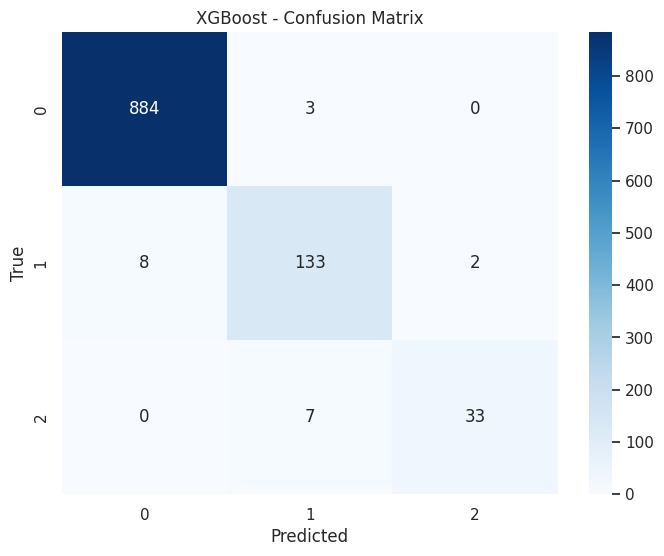

In [81]:
from sklearn.metrics import confusion_matrix
accuracy = accuracy_score(y_train, y_pred_cv)
print(f'XGBoost - Cross-Validation Accuracy: {accuracy}')

# Calculate and print the classification report
report = classification_report(y_train, y_pred_cv)
print('XGBoost - Classification Report:')
print(report)

class_labels = np.unique(y_train)

# Confusion Matrix
cm = confusion_matrix(y_train, y_pred_cv)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Feature Importance

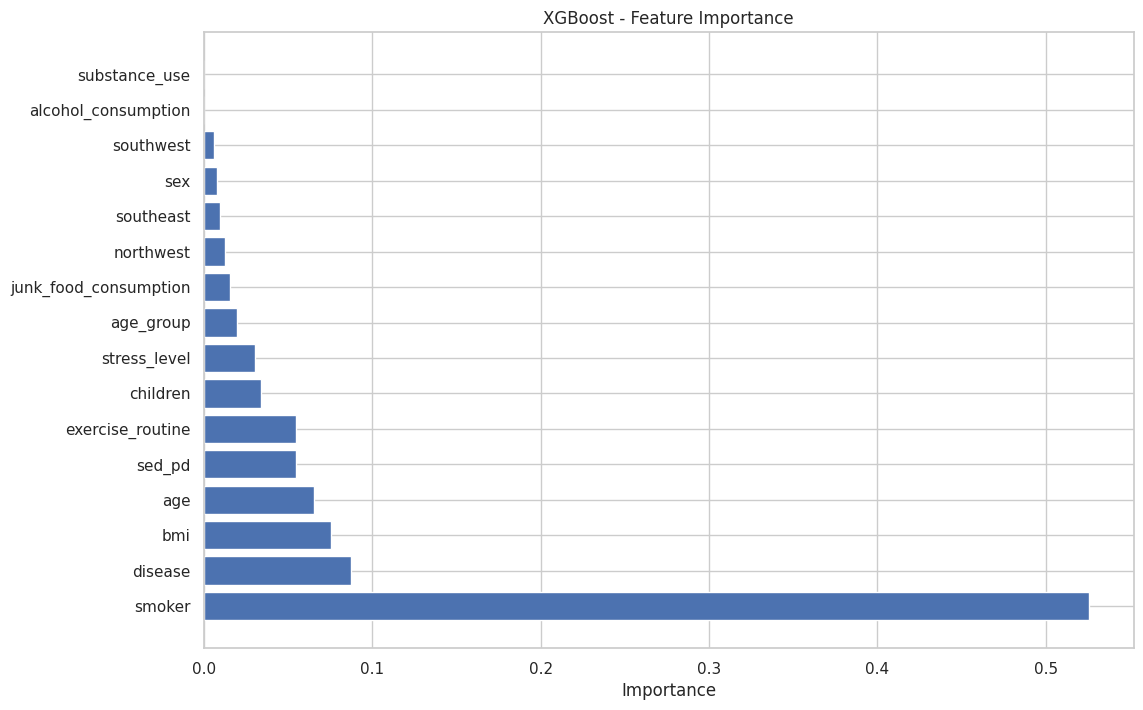

In [82]:
# Specify the XGBoost classifier with the best parameters
xgboost_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, scale_pos_weight=1.0)

# Fit the classifier to the training data
xgboost_classifier.fit(X_train, y_train)

# Get feature importance
feature_importances = xgboost_classifier.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('XGBoost - Feature Importance')
plt.show()


According to the feature imprtance graph the feature smoke/ disease and bmi appear to have the biggest feature importance while predicting insurance cost

## Cluster based analysis for age-range and insurance_class

In [83]:
df['age_group'].unique()

array([3, 4, 0, 1, 2])

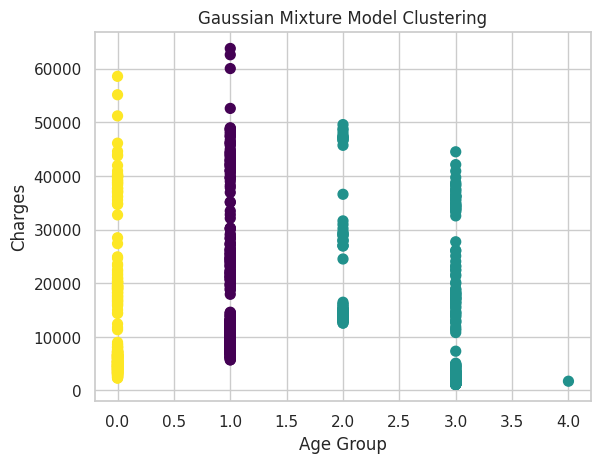

In [84]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'age_group' and 'charges'
df['age_group'] = df['age_group'].astype(int)  # Convert age_group to integers

X = df['age_group'].values.reshape(-1, 1)

# Experiment with different numbers of components
n_components = 3  # Adjust this value
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
gmm.fit(X)

# Predict labels
y_gmm = gmm.predict(X)

# Create a colormap based on the number of components
colors = plt.cm.viridis(np.linspace(0, 1, n_components))

# Scatter plot with customized colors
plt.scatter(df['age_group'], df['charges'], c=colors[y_gmm], s=50)
plt.xlabel('Age Group')
plt.ylabel('Charges')
plt.title('Gaussian Mixture Model Clustering')
plt.show()
